# Classification Theory

## Imports

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from scipy.io import arff

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import ssl

## Example 1: Breast Cancer Detection (Recall)

### Load Data

In [2]:
# Load the dataset
data = load_breast_cancer()

### Data Analysis

<Figure size 1000x800 with 0 Axes>

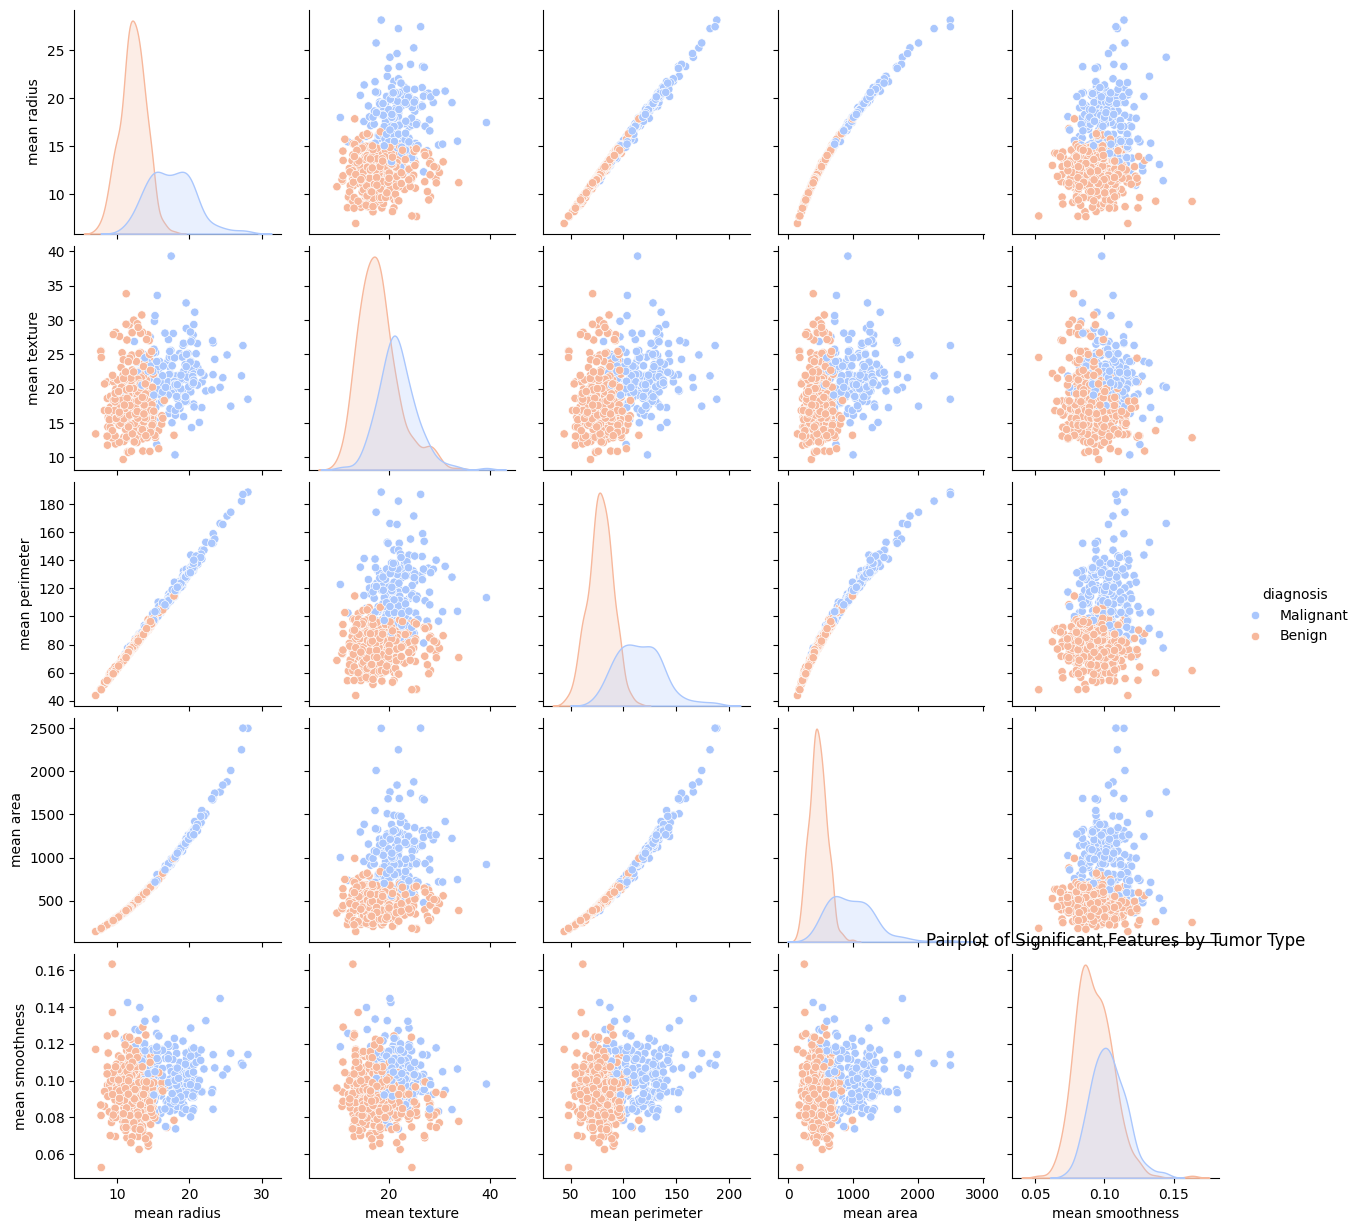

In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)
# Map target names for clarity
df['target'] = data.target
df['diagnosis'] = df['target'].map({0: 'Malignant', 1: 'Benign'})

# Display the first few rows of the dataframe
# print(df.head())

# Statistical summary of the data, focusing on differences in features by tumor type
# print(df.groupby('diagnosis').mean())

# Plotting some significant features
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
plt.figure(figsize=(10, 8))
sns.pairplot(df, vars=features, hue='diagnosis', palette='coolwarm')
plt.title('Pairplot of Significant Features by Tumor Type')
plt.show()

### Data Train-Test Split

In [4]:
# Invert the labels so 'benign' is 0 and 'malignant' is 1
y = 1 - df['target']  # Flipping the labels

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], y, test_size=0.3, random_state=42)

### Train/Fit Algorithm

In [5]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=42)  # Using 'liblinear' for binary classification
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

### Predict on Test Data

In [6]:
# Predictions
y_pred = model.predict(X_test)

### Evaluation

Evaluation with what metric? Accuracy?

In [7]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2}")

Accuracy: 0.94


### What about confusion matrix?

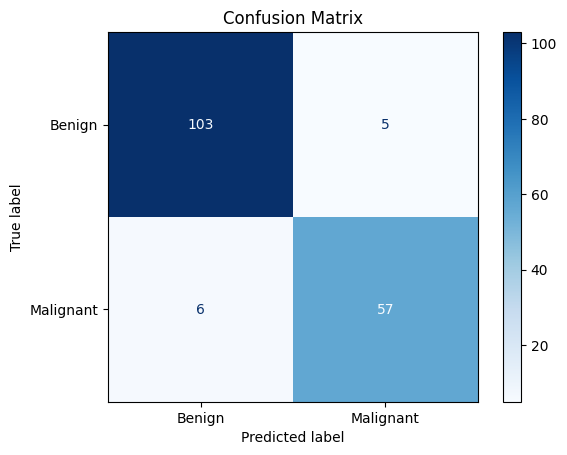

In [8]:
# Display the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=["Benign", "Malignant"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

- 103 benign tumors are detected correctly!
- 57 malignant tumors are detected correctly too, awesome!
- 5 benign tumors are detected as malignant, sorry for the extra stress but these false positives are going to be corrected in the 2nd test!
- **6 malignant tumors are detected as malignant, upps! hopefully they are sceptical and will have another test :(**

In [9]:
# Evaluation Metrics
recall = recall_score(y_test, y_pred, pos_label=1)
precision = precision_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
print(f"Recall (sensitivity): {recall:.2}")
print(f"Precision: {precision:.2}")
print(f"F1 Score: {f1:.2}")

Recall (sensitivity): 0.9
Precision: 0.92
F1 Score: 0.91


## Example 2: Spam Filtering (Precision)

### Load Data

In [10]:
# Load the dataset from .arff file
path_to_file = 'dataset_44_spambase.arff'  # Update this to the path of your .arff file
data = arff.loadarff(path_to_file)
df = pd.DataFrame(data[0])

# Convert bytes to strings for object type columns
str_df = df.select_dtypes([object])
str_df = str_df.stack().str.decode('utf-8').unstack()
for col in str_df:
    df[col] = str_df[col]

df['class'] = df['class'].astype(int)

# Define features and target
X = df.drop(['class'], axis=1)
y = df['class']

### Data Analysis

<Figure size 1000x800 with 0 Axes>

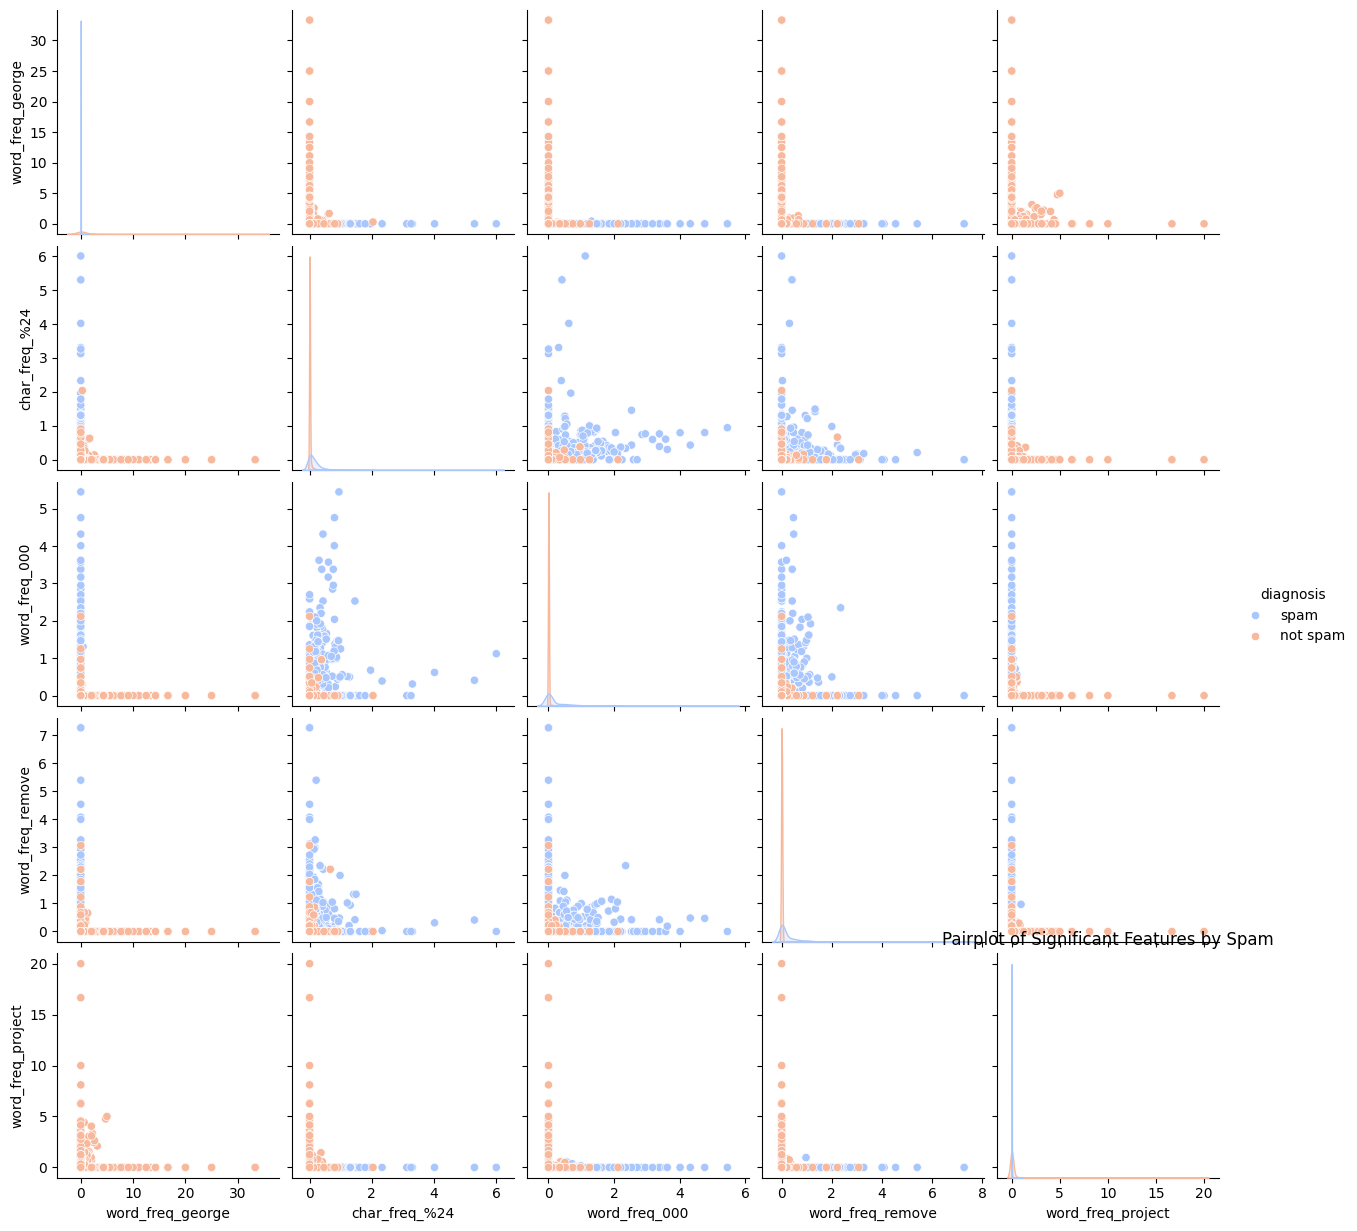

In [11]:
df['diagnosis'] = df['class'].map({0: 'not spam', 1: 'spam'})

features = ['word_freq_george','char_freq_%24','word_freq_000','word_freq_remove','word_freq_project']

plt.figure(figsize=(10, 8))
sns.pairplot(df, vars=features, hue='diagnosis', palette='coolwarm')
plt.title('Pairplot of Significant Features by Spam')
plt.show()

### Data Train-Test Split

In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Train/Fit Algorithm

In [13]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(solver='liblinear', class_weight='balanced')  # 'balanced' to adjust weights inversely proportional to class frequencies
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

### Predict on Test Data

In [14]:
# Predictions
y_pred = model.predict(X_test)

### Evaluation

Evaluation with which metric? Accuracy? Recall? Precision?

In [15]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label=1)
precision = precision_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
print(f"Accuracy: {accuracy:.2}")
print(f"Recall (sensitivity): {recall:.2}")
print(f"Precision: {precision:.2}")
print(f"F1 Score: {f1:.2}")

Accuracy: 0.93
Recall (sensitivity): 0.92
Precision: 0.9
F1 Score: 0.91


### Confusion Matrix

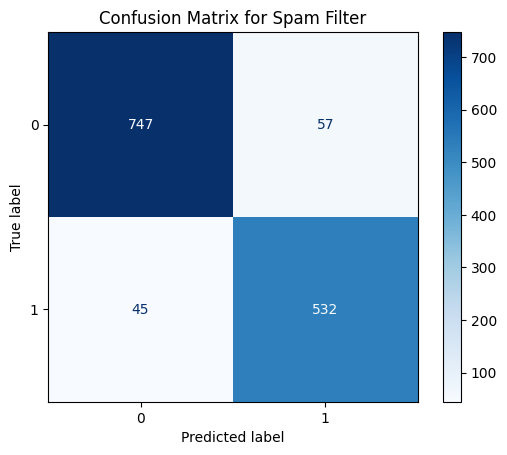

In [16]:
# Display the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Spam Filter')
plt.show()

- 747 non-spam emails are detected correctly!
- 532 spam emails are detected correctly too!
- 45 spam emails are missed and classified as not-spam. Upps, that may create some noise to customers!
- **57 normal emails are misclassified and sent to the junk folder. customer might miss some critical information, that is pretty bad :(**

### Feature Importance

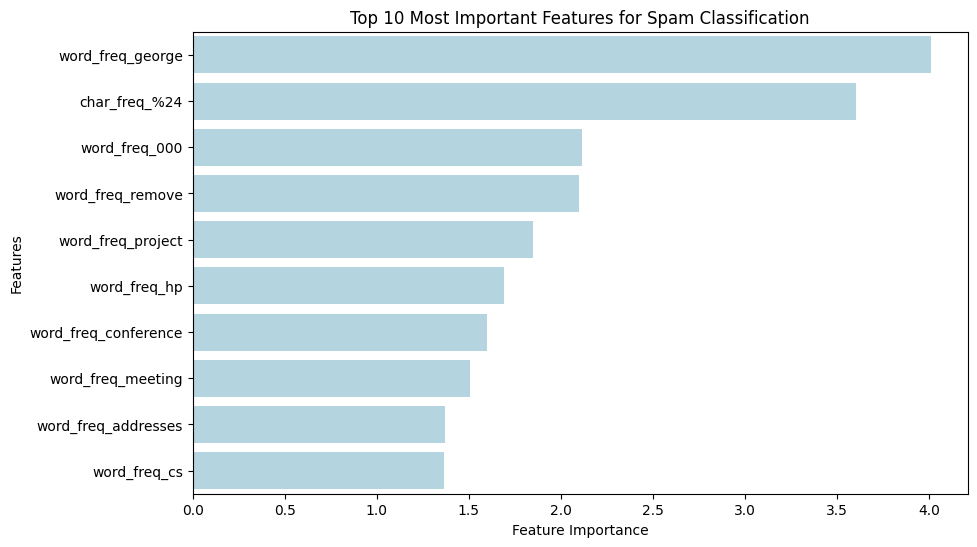

In [17]:
# Feature Importance Analysis
importance = np.abs(model.coef_[0])
features = X.columns
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Select top 10 most important features
top_features = feature_importance.head(10)

# Plotting feature importance with a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x='Importance', y='Feature', color='lightblue')
plt.title('Top 10 Most Important Features for Spam Classification')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

## Example 3: Handwriting Recognition (Multiclass Classification)

### Load Data

In [18]:
# Load the dataset from .arff file
path_to_file = 'mnist_784.arff'  # Update this to the path of your .arff file
data = arff.loadarff(path_to_file)
df = pd.DataFrame(data[0])

df['class'] = df['class'].astype(int)

# Define features and target
X = df.drop(['class'], axis=1)
y = df['class']

### Data Analysis

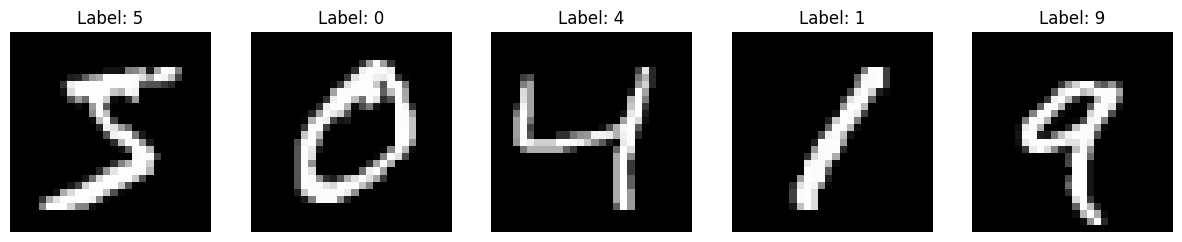

In [19]:
# Convert the data to an array and reshape it to the original image dimensions
images = X.to_numpy()
labels = y.to_numpy()

# Setup matplotlib figure and axes
fig, axes = plt.subplots(1, 5, figsize=(15, 3))  # 1 row, 5 columns of images

# Loop through the first 5 indices and plot each image
for i in range(5):
    ax = axes[i]
    image = X.iloc[i].values.reshape(28, 28)  # Reshape the flat array back to 2D
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Label: {y[i]}')
    ax.axis('off')  # Turn off axis to not show ticks

plt.show()

### Data Train-Test Split

In [20]:
# Scale data to normalize feature scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Train/Fit Algorithm

In [21]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### Predict on Test Data

In [22]:
# Predicting the test set results
y_pred = model.predict(X_test)

### Evaluation

Evaluation with which metric? Accuracy? Recall? Precision?

In [23]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2}")
# print(f"Recall (sensitivity): {recall:.2}")
# print(f"Precision: {precision:.2}")

Accuracy: 0.92


### Confusion Matrix

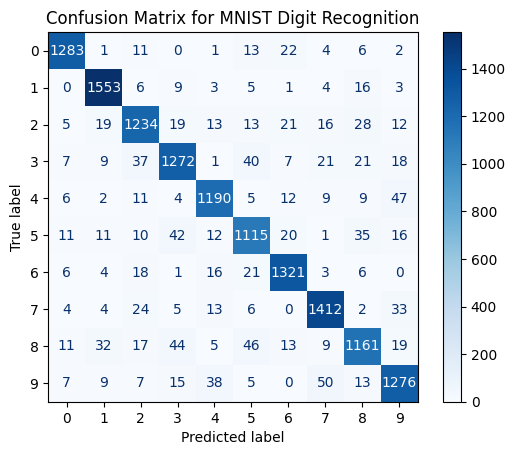

In [24]:
# Display the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for MNIST Digit Recognition')
plt.show()

## Example 4: Heart Disease Detection (ROC-AUC Analysis)

### Load Data

In [25]:
# Load the dataset
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv('hearth_disease.csv', names=column_names, header=None, na_values="?") 
df.dropna(inplace=True)  # Remove missing values for simplicity

# Convert target to binary classification: presence (1,2,3,4) vs absence (0) of heart disease
df['target'] = (df['target'] > 0).astype(int)

### Data Analysis

In [26]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


### Data Train-Test Split

In [27]:
X = df.drop(columns=['target'])
y = df['target']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

### Train/Fit Algorithm

In [28]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

### Predict on Test Data

In [29]:
# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # probabilities for the positive class

### Evaluation

Accuracy: 0.81
Recall (sensitivity): 0.75
Precision: 0.88
F1 Score: 0.81


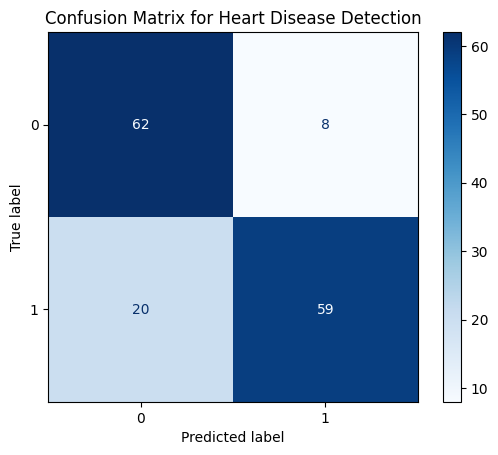

In [30]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2}")
print(f"Recall (sensitivity): {recall:.2}")
print(f"Precision: {precision:.2}")
print(f"F1 Score: {f1:.2}")

# Display the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Heart Disease Detection')
plt.show()

### ROC-AUC

<Figure size 640x480 with 0 Axes>

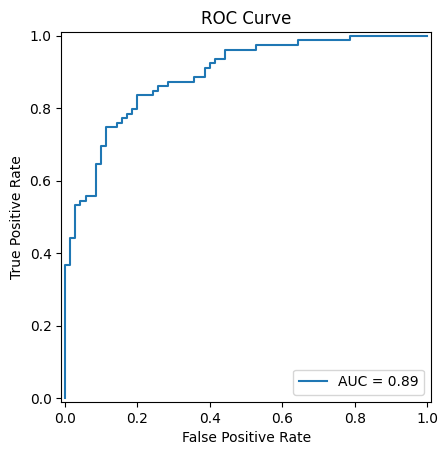

In [31]:
# ROC and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Display ROC Curve
plt.figure()
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.title('ROC Curve')
plt.show()

## Example 5: Credit Card Fraud Detection (Imbalanced Dataset)

### Load Data

In [32]:
# Load the dataset
df = pd.read_csv('creditcard.csv')
df = df.sample(frac=0.1) # take 10% sample for quick training

# Define features and target
X = df.drop('Class', axis=1)
y = df['Class']

### Data Analysis

In [33]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
103524,68697.0,1.281262,0.346403,0.155864,0.608890,-0.194042,-0.866691,0.081381,-0.182564,0.052579,...,-0.310784,-0.893786,0.084375,-0.014100,0.265024,0.116591,-0.023385,0.027275,1.98,0
6514,7823.0,1.237940,0.539518,-0.005999,1.264500,0.262913,-0.686645,0.353886,-0.275062,1.062206,...,-0.124867,-0.037086,-0.098582,0.023210,0.743601,-0.303948,-0.020623,0.000167,0.89,0
19774,30549.0,-0.516035,1.079275,1.213098,0.006359,0.148216,-0.530479,0.579081,0.067161,-0.226481,...,-0.227388,-0.630094,0.044512,0.003088,-0.264456,0.091573,0.123194,0.090628,3.77,0
241503,151052.0,-1.570679,0.128156,1.063422,-0.540896,0.580947,1.337857,-0.173127,1.021323,-0.181851,...,0.469105,1.260916,0.074524,-1.242929,-0.294098,0.512529,0.275570,0.039056,89.00,0
85703,60896.0,1.200390,-0.048767,0.567921,0.376177,-0.713311,-0.712356,-0.176156,0.010309,0.283500,...,-0.192331,-0.516685,0.086426,0.543959,0.239211,0.418523,-0.052398,0.000565,4.73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265571,161945.0,2.020909,-0.832308,-0.167342,-1.391288,-1.278187,-0.892321,-0.900338,-0.047097,2.457610,...,0.084512,0.521410,0.253465,0.012939,-0.380382,-0.303718,0.057579,-0.032808,7.06,0
200850,133606.0,1.987726,-1.378038,0.115303,-0.166559,-1.477428,0.517343,-1.521773,0.239882,0.920287,...,-0.433478,-0.531062,0.342515,0.582246,-0.577542,0.501238,0.020878,-0.022220,53.00,0
125242,77586.0,1.267808,-0.697943,0.256852,-0.729650,-0.979809,-0.518998,-0.510234,-0.060089,-1.045196,...,-0.428875,-0.942744,0.045805,0.012408,0.081654,0.902348,-0.071208,0.006524,61.66,0
19259,30126.0,-1.522215,0.567701,0.782143,1.232116,0.053600,0.398705,0.231166,0.540393,0.094870,...,-0.107116,0.117628,-0.052201,-0.337631,-0.082331,-0.238662,0.180251,-0.075150,62.95,0


### Data Train-Test Split

In [46]:
# Scale data to normalize feature scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

### Train/Fit Algorithm

In [50]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, class_weight='balanced')  # Use balanced to adjust weights inversely proportional to class frequencies
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

### Predict on Test Data

In [51]:
# Make predictions
y_pred = model.predict(X_test)

### Evaluation

Accuracy: 1.0
Recall (sensitivity): 0.76
Precision: 0.34
F1 Score: 0.47


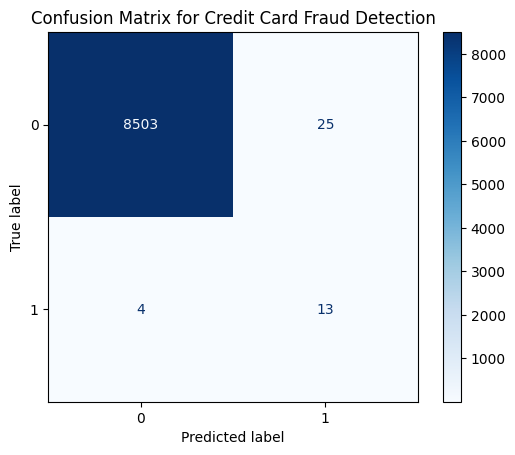

In [52]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2}")
print(f"Recall (sensitivity): {recall:.2}")
print(f"Precision: {precision:.2}")
print(f"F1 Score: {f1:.2}")

# Display the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Credit Card Fraud Detection')
plt.show()

Check the proportion between true and false classes. this is a **highly imbalanced dataset**